# Testing

In [1]:
# import pandas as pd
# import numpy as np
from binance.client import Client
from downloader import Downloader
import matplotlib.pyplot as plt
dl = Downloader()

In [39]:
import pandas as pd

In [40]:
data = pd.read_csv("data/ATOMUSDT-past.csv")

In [41]:
data

,timestamp,open,high,low,close,volume
0,1556510400000,4.755,4.755,4.200,4.302,159193.966
1,1556510460000,4.302,4.387,4.114,4.276,46509.507
2,1556510520000,4.274,4.274,4.013,4.171,90260.338
3,1556510580000,4.153,4.249,4.146,4.203,28693.080
4,1556510640000,4.232,4.250,4.104,4.177,30136.229
...,...,...,...,...,...,...
1263764,1632548040000,41.530,41.540,41.410,41.500,1897.360
1263765,1632548100000,41.510,41.570,41.470,41.500,1544.430
1263766,1632548160000,41.540,41.650,41.540,41.620,4405.310
1263767,1632548220000,41.620,41.790,41.610,41.750,6189.000


In [2]:
import time

In [44]:
start = time.time()
data = dl.get_minutely_data("ATOMUSDT", past=False)
time.time()-start

2.3682050704956055

In [34]:
from datetime import datetime

In [46]:
data["timestamp"] = list(map(lambda x: datetime.fromtimestamp(x / 1e3), data.timestamp))

In [47]:
data.set_index("timestamp", inplace=True)

In [48]:
data

,open,high,low,close,volume
timestamp,,,,,
2019-04-28 21:00:00,4.755,4.755,4.200,4.302,159193.966
2019-04-28 21:01:00,4.302,4.387,4.114,4.276,46509.507
2019-04-28 21:02:00,4.274,4.274,4.013,4.171,90260.338
2019-04-28 21:03:00,4.153,4.249,4.146,4.203,28693.080
2019-04-28 21:04:00,4.232,4.250,4.104,4.177,30136.229
...,...,...,...,...,...
2021-09-26 20:29:00,39.720,39.770,39.700,39.710,727.560
2021-09-26 20:30:00,39.710,39.720,39.600,39.620,2194.810
2021-09-26 20:31:00,39.620,39.640,39.570,39.610,2544.130


In [94]:
data

,open,high,low,close,volume
timestamp,,,,,
2019-04-28 21:00:00,4.755,4.755,4.200,4.302,159193.966
2019-04-28 21:01:00,4.302,4.387,4.114,4.276,46509.507
2019-04-28 21:02:00,4.274,4.274,4.013,4.171,90260.338
2019-04-28 21:03:00,4.153,4.249,4.146,4.203,28693.080
2019-04-28 21:04:00,4.232,4.250,4.104,4.177,30136.229
...,...,...,...,...,...
2021-09-26 20:29:00,39.720,39.770,39.700,39.710,727.560
2021-09-26 20:30:00,39.710,39.720,39.600,39.620,2194.810
2021-09-26 20:31:00,39.620,39.640,39.570,39.610,2544.130


In [182]:
df = pd.DataFrame(data["open"].resample('6H').first(), columns=["open"])
df["high"] = data["high"].resample('6H').max()
df["low"] = data["low"].resample('6H').min()
df["close"] = data["close"].resample('6H').last()
df["volume"] = data["volume"].resample('6H').sum()

In [183]:
df

,open,high,low,close,volume
timestamp,,,,,
2019-04-28 18:00:00,4.755,4.755,3.830,4.034,939845.165
2019-04-29 00:00:00,4.021,4.021,3.723,3.822,309197.465
2019-04-29 06:00:00,3.822,4.023,3.725,3.838,237970.369
2019-04-29 12:00:00,3.838,3.896,3.661,3.896,113225.638
2019-04-29 18:00:00,3.896,4.075,3.750,3.794,218880.401
...,...,...,...,...,...
2021-09-25 18:00:00,38.500,38.630,36.800,37.440,1642249.410
2021-09-26 00:00:00,37.400,39.480,35.430,38.630,2702900.710
2021-09-26 06:00:00,38.650,41.700,38.120,39.790,1791007.540


In [184]:
import mplfinance as mpf

In [185]:
mc = mpf.make_marketcolors(base_mpf_style = 'charles', volume="inherit", inherit=True)
s = mpf.make_mpf_style(base_mpf_style = 'charles', marketcolors=mc)

## TODO: page 364 + seeing how to do fig ax with mplfinance. 

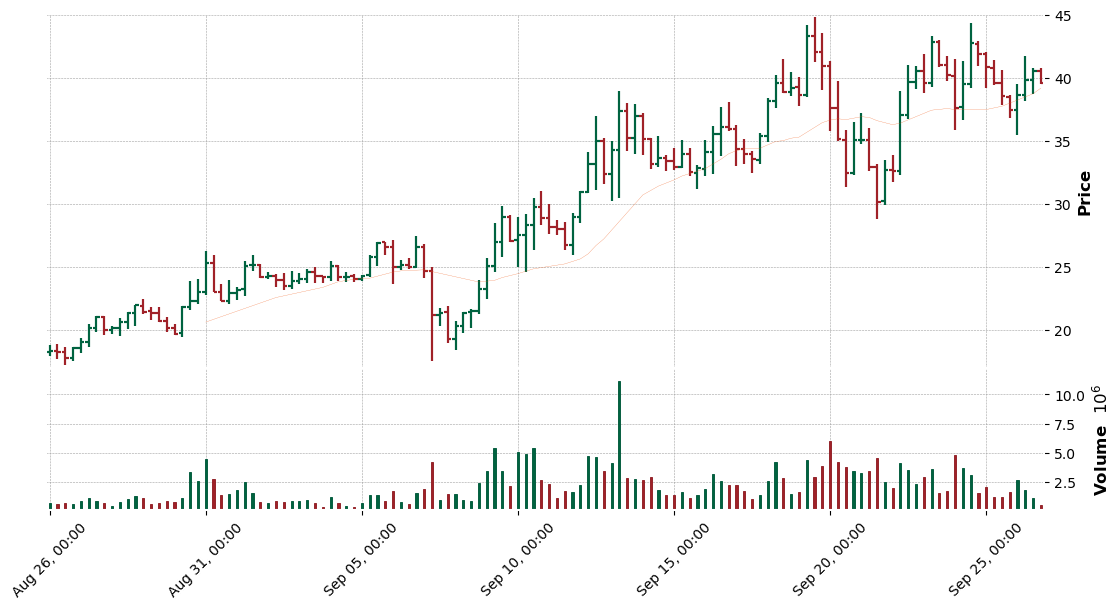

In [186]:
mpf.plot(df[-128:], figratio=(12, 6), 
         mav=(21), volume=True,
         tight_layout=True, style=s, 
         scale_width_adjustment=dict(volume=0.3,ohlc=1.3, lines=0.2, ohlc_linewidth=3))

In [17]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

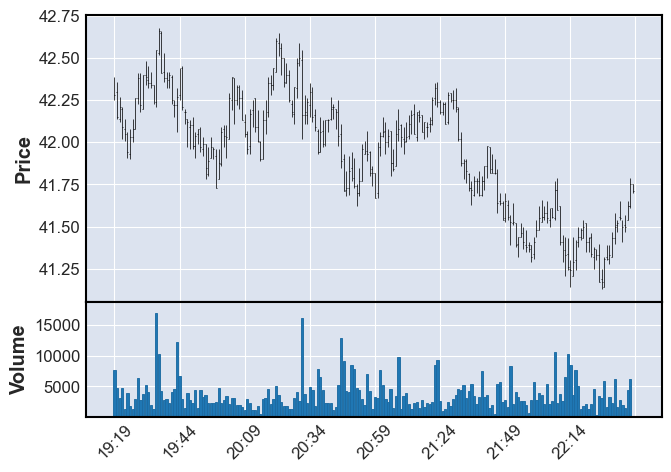

In [11]:
mpf.plot(data[-200:], volume=True)